In [1]:
import processing.content_stats as cs
import yaml
from utils.utils import fetch_import_module
import nltk
nltk.download('names')
%matplotlib inline

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/ubuntu/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package names to /home/ubuntu/nltk_data...
[nltk_data]   Package names is already up-to-date!


# 2. Semantic Perspective

## Data loading

In [ ]:
config = yaml.safe_load(open("config.yaml"))

In [ ]:
dataset_names = config['datasets']
data_sets_text, exclude, exclude_empty = [], [], []
for dset in dataset_names:
    dset_module = fetch_import_module(dset)
    data_sets_text.append(dset_module.get_data())
    exclude.append(set(config['non-hate-label'][dset]))
    exclude_empty.append(set())

In [3]:
embedding_path = str('../embeddings/cc.ar.300.vec')

## c) Cross-dataset topic model

### Only abusive classes

Filter embedding space to 210227-Alsafari-Alshalan-Albadi-Chowdhury-Mubarak-Mulki dataset...
Embedding model read in 479.903s.
210227-Alsafari-Alshalan-Albadi-Chowdhury-Mubarak-Mulki:36351
Build topics...
kNN...
N Threads: 4
NearestNeighbors K=500
Time 0.0068074949995207135
NN Distaces
Time 36.63476989500123
Saving cluwords
Matrix(36351, 36351)

Cosine Filter: 0.9
Computing TFIDF...
Number of cluwords 36351
Matrix(36351, 36351)

Computing TF...
tf shape (12000, 36351)
Cluwords TF done in 13.037s.
(12000, 36351)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=12000 and n_features=36351...
NMF done in 67.06080009599827.
Writing matrix W
W: (12000, 20) H:(36351, 20)
Writing matrix H
W: (12000, 20) H:(36351, 20)
tools/cluwords/cluwords/multi_embedding/results/210227-Alsafari-Alshalan-Albadi-Chowdhury-Mubarak-Mulki


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

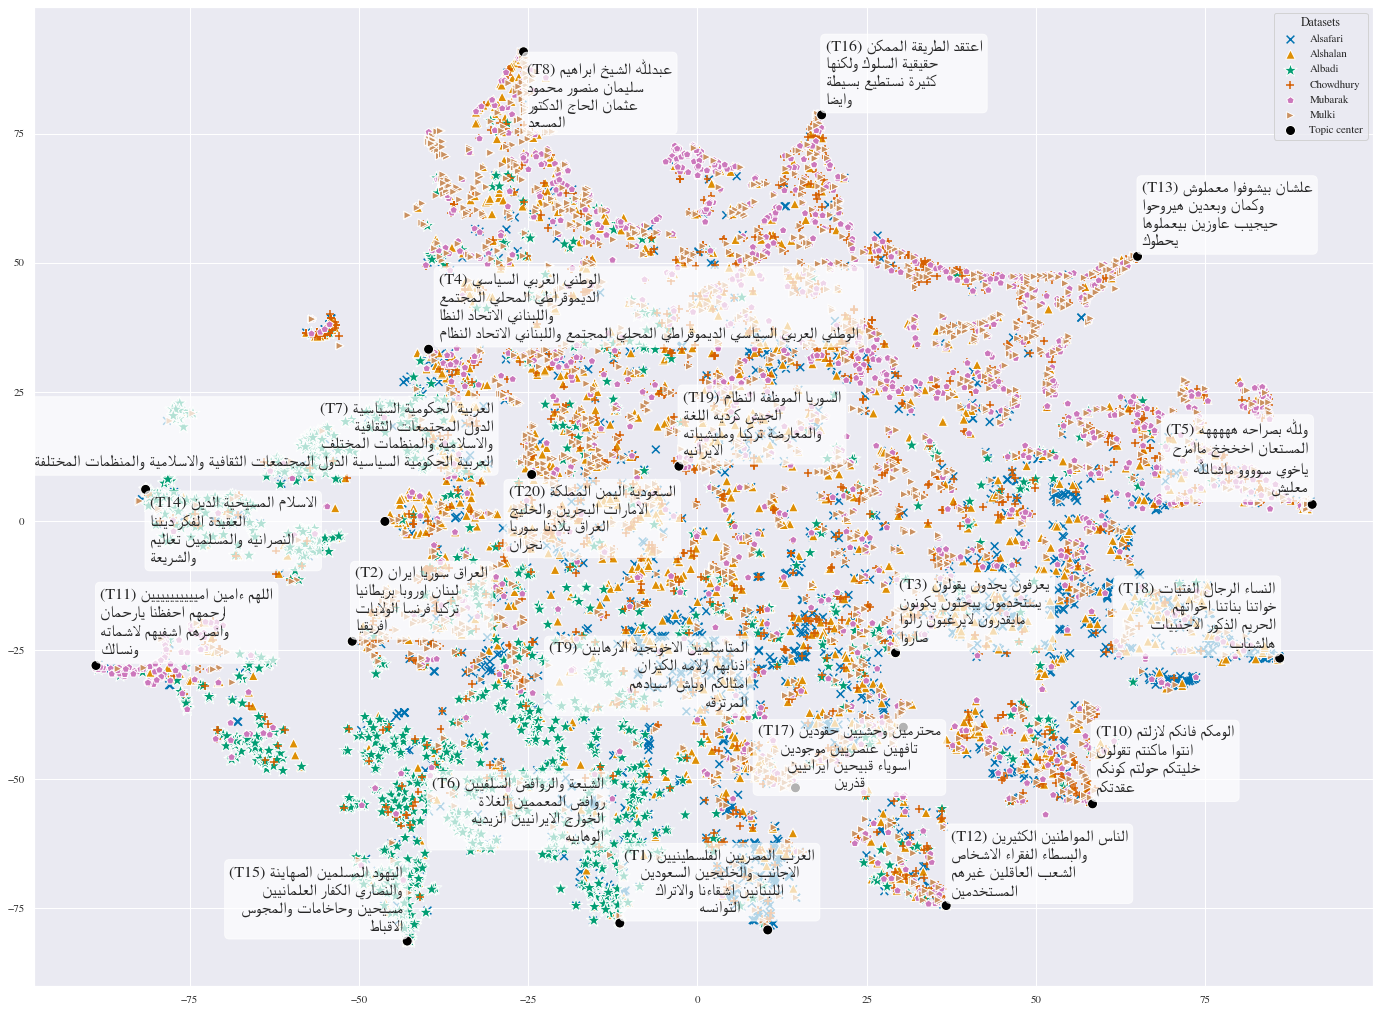

In [5]:
_ = cs.getContentMultiple(data_sets_text,exclude,dataset_names, embedding_path,file_suffix="hate-only",n=2000,on_distribution=True,components=20, language='arabic')

### All classes

Filter embedding space to 20210223-Alsafari-Alshalan-Albadi-Mulki-Osact-Shammur dataset...
Embedding model read in 512.479s.
20210223-Alsafari-Alshalan-Albadi-Mulki-Osact-Shammur:36055
Build topics...
kNN...
N Threads: 4
NearestNeighbors K=500
Time 0.007011982997937594
NN Distaces
Time 37.604598354999325
Saving cluwords
Matrix(36055, 36055)

Cosine Filter: 0.9
Computing TFIDF...
Number of cluwords 36055
Matrix(36055, 36055)

Computing TF...
tf shape (12000, 36055)
Cluwords TF done in 15.463s.
(12000, 36055)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=12000 and n_features=36055...
NMF done in 69.68666420299996.
Writing matrix W
W: (12000, 20) H:(36055, 20)
Writing matrix H
W: (12000, 20) H:(36055, 20)
tools/cluwords/cluwords/multi_embedding/results/20210223-Alsafari-Alshalan-Albadi-Mulki-Osact-Shammur


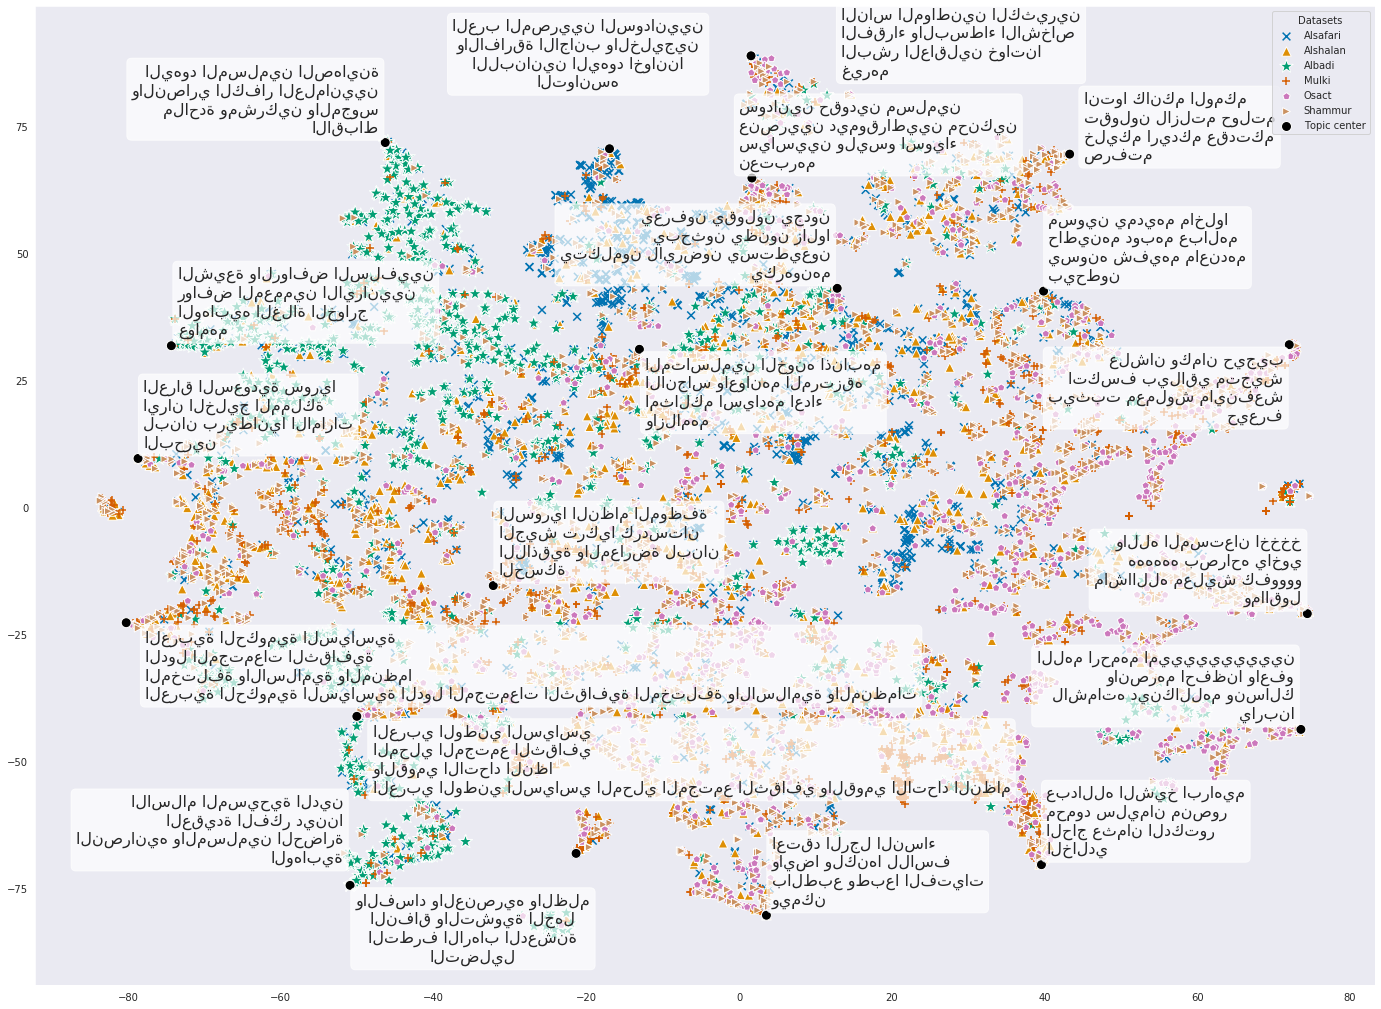

In [8]:
_ = cs.getContentMultiple(data_sets_text,exclude_empty,dataset_names, embedding_path,file_suffix="all-classes",n=2000,on_distribution=True,components=20)